In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.generate import GenerateData
from utils.generate import GenerateData_binomial

特徴量 X の形状： (100, 3)
目的変数 y の形状： (100,)
クラスの分布： [35 27 38]


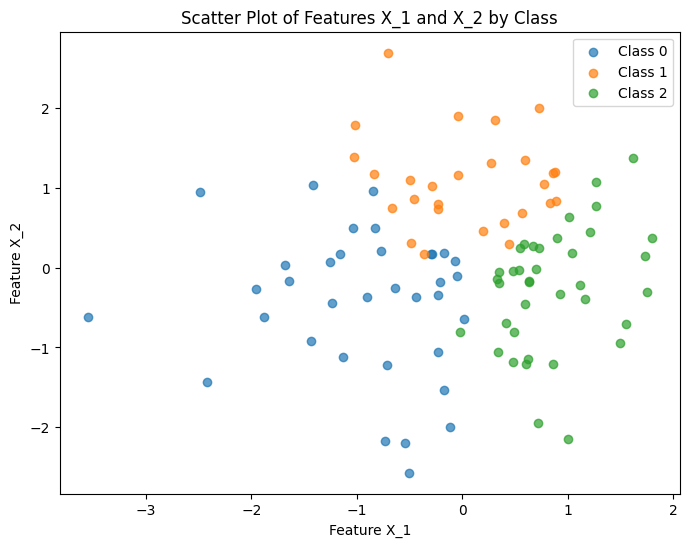

In [9]:
# 特徴量の数とクラス数を設定
n_features = 2
n_classes = 3

# 特徴量の平均と標準偏差を設定
X_mu_list = [0, 0]
X_sigma_list = [1, 1]

# パラメータの平均と標準偏差を設定（各クラスごとのリスト）
beta_mu_matrix = [
    [0, -10, 0],   # クラス0のβの平均
    [0, 0, 10],   # クラス1のβの平均
    [0, 10, 0],   # クラス2のβの平均
]

beta_sigma_matrix = [
    [0.01, 0.01, 0.01],    # クラス0のβの標準偏差
    [0.01, 0.01, 0.01],    # クラス1のβの標準偏差
    [0.01, 0.01, 0.01],    # クラス2のβの標準偏差
]

# クラスをインスタンス化
generator = GenerateData(
    n_features=n_features,
    n_classes=n_classes,
    X_mu_list=X_mu_list,
    X_sigma_list=X_sigma_list,
    beta_mu_matrix=beta_mu_matrix,
    beta_sigma_matrix=beta_sigma_matrix
)

# データを生成
X, y = generator.generate_non_bias_data()

# 結果の確認
print("特徴量 X の形状：", X.shape)
print("目的変数 y の形状：", y.shape)
print("クラスの分布：", np.bincount(y))

# 2次元の散布図でクラス別で色分けして表示
plt.figure(figsize=(8, 6))
for cls in range(n_classes):
    X_cls = X[y == cls]
    plt.scatter(X_cls[:, 1], X_cls[:, 2], label=f'Class {cls}', alpha=0.7)
plt.title('Scatter Plot of Features X_1 and X_2 by Class')
plt.xlabel('Feature X_1')
plt.ylabel('Feature X_2')
plt.legend()
plt.show()

特徴量 X の形状： (100, 3)
目的変数 y の形状： (100,)
クラスの分布： [15 10 75]


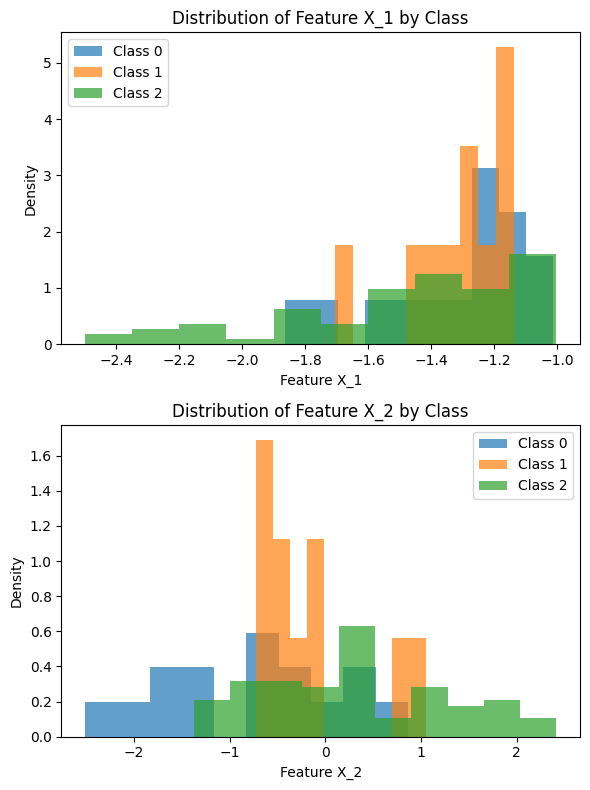

In [3]:
n_samples = 100
X_feature_bias = 1
center_of_sampling = -2
window_size = 2


X_bias, y_bias = generator.generate_bias_data_deterministic(n_samples, X_feature_bias, center_of_sampling, window_size)

# 結果の確認
print("特徴量 X の形状：", X_bias.shape)
print("目的変数 y の形状：", y_bias.shape)
print("クラスの分布：", np.bincount(y_bias))

# 各説明変数ごとに、クラスごとの説明変数分布を可視化
fig, axes = plt.subplots(n_features, 1, figsize=(6, n_features * 4))

for i in range(n_features):  # 説明変数の数だけループ
    ax = axes[i] if n_features > 1 else axes  # 説明変数が1つの場合は axes をそのまま使う
    for cls in range(n_classes):  # クラスの数だけループ
        # 各クラスのデータを抽出
        X_cls = X_bias[y_bias == cls]
        # 各クラスの各説明変数のデータをヒストグラムとしてプロット
        ax.hist(X_cls[:, i+1], label=f'Class {cls}', alpha=0.7, density=True)  # +1は切片項を考慮
    ax.set_title(f'Distribution of Feature X_{i+1} by Class')
    ax.set_xlabel(f'Feature X_{i+1}')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

In [4]:
# クラスのインスタンス化とデータ生成
generator = GenerateData(
    n_features=2,
    n_classes=3,
    X_mu_list=[0, 0],
    X_sigma_list=[1, 1],
    beta_mu_matrix=[
        [0.5, 1.0, -0.5],
        [-0.2, 0.3, 0.8],
        [0.0, -0.6, 0.4],
    ],
    beta_sigma_matrix=[
        [0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1],
    ]
)

# 非バイアスデータを生成
generator.generate_non_bias_data()

# 複数の特徴量を基準にバイアスサンプリング
n_samples = 100
X_features_bias = [1, 2]  # 特徴量のインデックス（切片は 0 番目）
centers_of_sampling = [0.5, -0.5]
window_sizes = [1.0, 1.0]

biased_X, biased_y = generator.generate_bias_data_deterministic(
    n_samples=n_samples,
    X_features_bias=X_features_bias,
    centers_of_sampling=centers_of_sampling,
    window_sizes=window_sizes
)

# 結果の確認
print("バイアスサンプリングされた特徴量 X の形状：", biased_X.shape)
print("バイアスサンプリングされた目的変数 y の形状：", biased_y.shape)

バイアスサンプリングされた特徴量 X の形状： (100, 3)
バイアスサンプリングされた目的変数 y の形状： (100,)


# サンプルタイプ検証

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.generate import GenerateData
from utils.generate import GenerateData_binomial

yの平均: 0.463041
y_biasの平均: 0.65


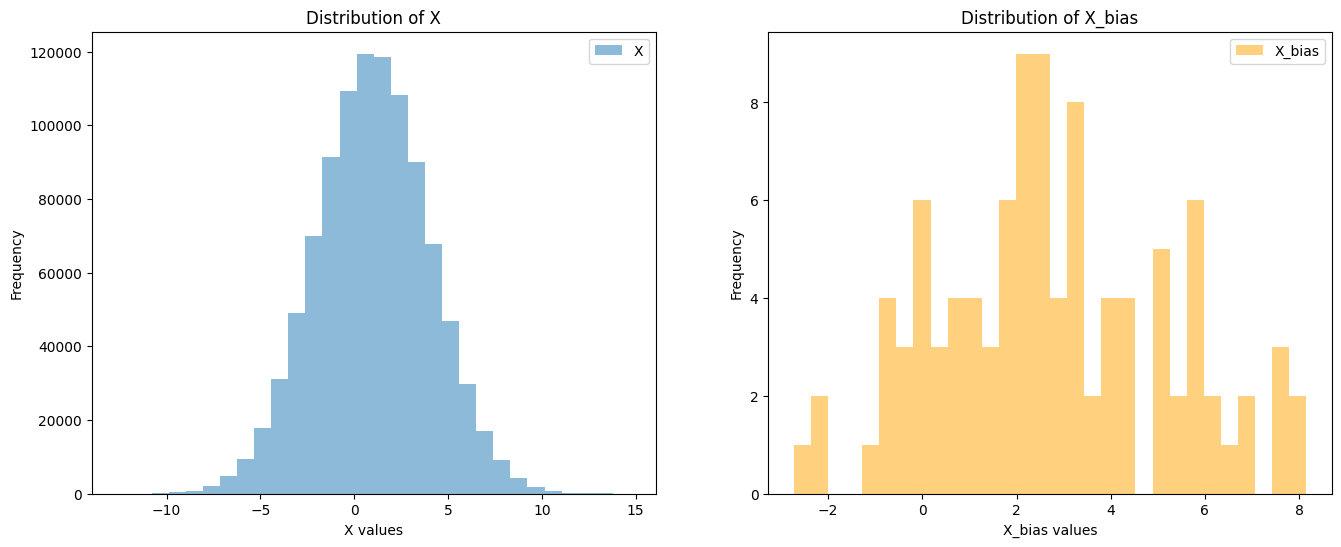

In [5]:
# 特徴量の数を設定
n_features = 1

# 特徴量の平均と標準偏差を設定
X_mu = [1]
X_sigma = [3]

# パラメータの平均と標準偏差を設定
beta_mu = [-1,1]
beta_sigma = [0.1,0.1]

# クラスをインスタンス化
generator = GenerateData_binomial(
    n_features=n_features,
    X_mu_list=X_mu,
    X_sigma_list=X_sigma,
    beta_mu=beta_mu, # beta_mu_matrixをbeta_muに変更
    beta_sigma=beta_sigma # beta_sigma_matrixをbeta_sigmaに変更
)

# データを生成
X, y = generator.generate_non_bias_data()

X_bias, y_bias = generator.generate_bias_data(n_samples=100, X_features_bias= 1 , threshfold= 1,sample_type="threshfold_smooth")

# yとy_biasの平均を出力
print("yの平均:", np.mean(y))
print("y_biasの平均:", np.mean(y_bias))


fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1行2列のサブプロットを作成

# Xのヒストグラムを描画
axes[0].hist(X[:, 1], bins=30, label='X', alpha=0.5)
axes[0].set_xlabel('X values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of X')
axes[0].legend()

# X_biasのヒストグラムを描画
axes[1].hist(X_bias[:, 1], bins=30, label='X_bias', alpha=0.5, color='orange')
axes[1].set_xlabel('X_bias values')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of X_bias')
axes[1].legend()

plt.show()